In [1]:
%load_ext autoreload
%autoreload 2
import numpy as np
import matplotlib.pyplot as plt
import os, sys
from astropy.table import Table
from lace.cosmo import camb_cosmo, fit_linP
from pcross_model_forestflow import load_emulator, load_arinyo, get_pcross_forestflow, get_forestflow_params
# from likelihood import Likelihood_Pcross, vary_params
# from tools import LAMBDA_LYA
LAMBDA_LYA=1216
sys.path.insert(0, '/global/homes/m/mabdulka/Software/LyaP3D')
sys.path.insert(0, '/global/homes/m/mabdulka/Software/FitLyaP3D/Forestflow')
# from iminuit import Minuit

In [2]:
# set our cosmo (fixed)
omnuh2 = 0.0006
mnu = omnuh2 * 93.14
H0 = 67.36
omch2 = 0.12
ombh2 = 0.02237
As = 2.1e-9
ns = 0.9649
nrun = 0.0
w = -1.0
omk = 0
cosmo = {
    'H0': H0,
    'omch2': omch2,
    'ombh2': ombh2,
    'mnu': mnu,
    'omk': omk,
    'As': As,
    'ns': ns,
    'nrun': nrun,
    'w': w
}



In [62]:
# z=np.array([2.2])
z=np.array([2.2,2.4])

In [63]:
sim_cosmo = camb_cosmo.get_cosmology_from_dictionary(cosmo)
dAA_dMpc_zs = camb_cosmo.dAA_dMpc(sim_cosmo, z, LAMBDA_LYA)
dkms_dMpc_zs = camb_cosmo.dkms_dMpc(sim_cosmo, z)

In [64]:
#  z=2.2 parameters from Michael's paper 1808.04367 table 4
initial_mF_z0 = 0.825
initial_T0_z0 = 1.014 * 1e4
initial_gamma_z0 = 1.74
initial_lambda_pressure_z0 = 79.4


initial_T0_z1 = 1.165*1e4 # Kelvin
initial_gamma_z1 = 1.63
initial_mF_z1 = 0.799
initial_lambda_pressure_z1 = 81.1 # [kpc]
igm_param_dict = {
        "mF": np.array([initial_mF_z0, initial_mF_z1]),
        "gamma":np.array([initial_gamma_z0, initial_gamma_z1]),
        "lambda_pressure": np.array([initial_lambda_pressure_z0, initial_lambda_pressure_z1]),
        "T0": np.array([initial_T0_z0, initial_T0_z1]),
    }
# igm_param_dict = {
#         "mF": initial_mF_z0,
#         "gamma": initial_gamma_z0,
#         "lambda_pressure": initial_lambda_pressure_z0,
#         "T0": initial_T0_z0,
#     }
emu_params, info_power = get_forestflow_params(z, igm_param_dict, dkms_dMpc_zs, cosmo)

In [65]:
forestflow_emulator = load_emulator(Nrealizations=1000)

/Users/mlokken/research/lyman_alpha/software/ForestFlow/forestflow/P3D_cINN.py:781: UserWarning: Loading a pre-trained emulator
  warn("Loading a pre-trained emulator")


In [66]:
arinyo_model = load_arinyo(z, cosmo)

In [67]:
k_parallel_AA = np.array([0.08925, 0.26775, 0.44625, 0.62475, 0.80325, 0.98175, 1.16025,
       1.33875, 1.51725, 1.69575, 1.87425, 2.05275, 2.23124, 2.40974,
       2.58824, 2.76674, 2.94524, 3.12374, 3.30224, 3.48074, 3.65924,
       3.83774])

In [68]:
mean_ang_separation_deg = np.array([0.        , 0.01214965, 0.0315861 , 0.05049507, 0.06501203,
       0.07540583, 0.0849924 , 0.0948946 , 0.10525764, 0.11518623,
       0.12517739, 0.13523737, 0.1450036 , 0.15507418, 0.16504229,
       0.17509879, 0.18501545, 0.19507285, 0.20500121, 0.21521826,
       0.22520216, 0.2349016 , 0.24509918, 0.2550668 , 0.26510843,
       0.27496408, 0.28508226 , 0.29487144, 0.35228993, 0.45169857,
       0.55142291])

In [69]:
pivot_k = 0.7 # Mpc^-1
# compute Delta_P and n_P
linP_zs = fit_linP.get_linP_Mpc_zs(sim_cosmo, z, pivot_k) # here z could be an array of zs if desired (e.g., [2.2, 2.4, 2.6])

In [70]:
delta_np_dict = {}
delta_np_dict["Delta2_p"] = np.zeros(len(z))
delta_np_dict["n_p"] = np.zeros(len(z))
for i in range(len(z)):
    delta_np_dict["Delta2_p"][i]=linP_zs[i]['Delta2_p']
    delta_np_dict["n_p"][i]=linP_zs[i]['n_p']
delta_np_dict
    

{'Delta2_p': array([0.54881963, 0.48819461]),
 'n_p': array([-2.30278037, -2.30278028])}

In [76]:
np.array([mean_ang_separation_deg,mean_ang_separation_deg])

array([[0.        , 0.01214965, 0.0315861 , 0.05049507, 0.06501203,
        0.07540583, 0.0849924 , 0.0948946 , 0.10525764, 0.11518623,
        0.12517739, 0.13523737, 0.1450036 , 0.15507418, 0.16504229,
        0.17509879, 0.18501545, 0.19507285, 0.20500121, 0.21521826,
        0.22520216, 0.2349016 , 0.24509918, 0.2550668 , 0.26510843,
        0.27496408, 0.28508226, 0.29487144, 0.35228993, 0.45169857,
        0.55142291],
       [0.        , 0.01214965, 0.0315861 , 0.05049507, 0.06501203,
        0.07540583, 0.0849924 , 0.0948946 , 0.10525764, 0.11518623,
        0.12517739, 0.13523737, 0.1450036 , 0.15507418, 0.16504229,
        0.17509879, 0.18501545, 0.19507285, 0.20500121, 0.21521826,
        0.22520216, 0.2349016 , 0.24509918, 0.2550668 , 0.26510843,
        0.27496408, 0.28508226, 0.29487144, 0.35228993, 0.45169857,
        0.55142291]])

In [79]:
inout_unit = 'AA'
sepbins_unit = 'deg'
Px = get_pcross_forestflow(k_parallel_AA, np.array([mean_ang_separation_deg,mean_ang_separation_deg]), z, cosmo, dAA_dMpc_zs, dkms_dMpc_zs, 
                                  forestflow_emulator, arinyo_model, inout_unit, sepbins_unit, 
                                  delta_np_dict,
                      np.array([initial_mF_z0, initial_mF_z1]), np.array([initial_T0_z0, initial_T0_z1]), np.array([initial_gamma_z0, initial_gamma_z1]), np.array([initial_lambda_pressure_z0, initial_lambda_pressure_z1]))

{'mF': array([0.825, 0.799]), 'gamma': array([1.74, 1.63]), 'sigT_Mpc': array([0.13114502, 0.14057102]), 'kF_Mpc': array([12.59445844, 12.33045623]), 'Delta2_p': array([0.54881963, 0.48819461]), 'n_p': array([-2.30278037, -2.30278028]), 'z': array([2.2, 2.4])}


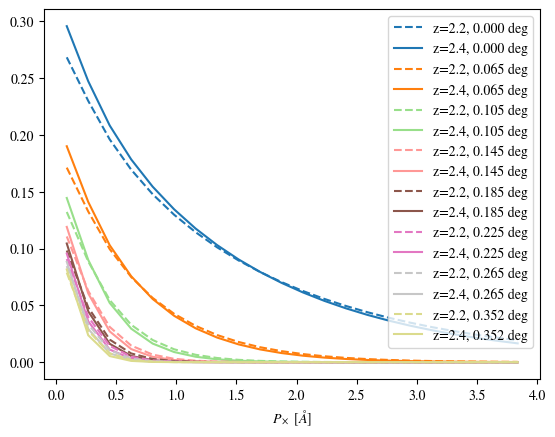

In [80]:

colors = plt.get_cmap('tab20')
for sepbin, separation in enumerate(mean_ang_separation_deg[::4]):
    for i, z_i in enumerate(z):
        if i ==0:
            linestyle='--'
        else:
            linestyle='solid'
        plt.plot(k_parallel_AA, Px[i][sepbin], label=f'z={z_i}, {separation:.3f} deg', color=colors(sepbin/len(mean_ang_separation_deg[::4])), linestyle=linestyle)
    # plt.xscale('log')
plt.xlabel(r"$P_\times$ [$\AA$]")
plt.legend()

Make sure it works with a single z as well

In [81]:
z=np.array([2.2])
igm_param_dict = {
        "mF": np.array(initial_mF_z0),
        "gamma":np.array(initial_gamma_z0),
        "lambda_pressure": np.array(initial_lambda_pressure_z0),
        "T0": np.array(initial_T0_z0),
    }
emu_params, info_power = get_forestflow_params(z, igm_param_dict, dkms_dMpc_zs, cosmo)

In [82]:
pivot_k = 0.7 # Mpc^-1
# compute Delta_P and n_P
linP_zs = fit_linP.get_linP_Mpc_zs(sim_cosmo, z, pivot_k) # here z could be an array of zs if desired (e.g., [2.2, 2.4, 2.6])
delta_np_dict = {}
delta_np_dict["Delta2_p"] = np.zeros(len(z))
delta_np_dict["n_p"] = np.zeros(len(z))
for i in range(len(z)):
    delta_np_dict["Delta2_p"][i]=linP_zs[i]['Delta2_p']
    delta_np_dict["n_p"][i]=linP_zs[i]['n_p']
delta_np_dict
    

{'Delta2_p': array([0.54881963]), 'n_p': array([-2.30278037])}

In [84]:
inout_unit = 'AA'
sepbins_unit = 'deg'
Px = get_pcross_forestflow(k_parallel_AA, np.array([mean_ang_separation_deg]), z, cosmo, dAA_dMpc_zs, dkms_dMpc_zs, 
                                  forestflow_emulator, arinyo_model, inout_unit, sepbins_unit, 
                                  delta_np_dict,
                      np.array([initial_mF_z0]), np.array([initial_T0_z0]), np.array([initial_gamma_z0]), np.array([initial_lambda_pressure_z0]))

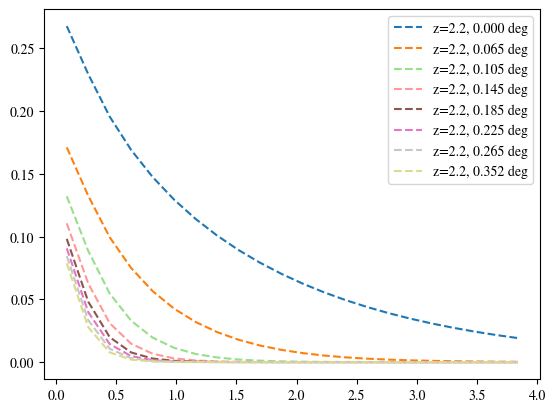

In [85]:

colors = plt.get_cmap('tab20')
for sepbin, separation in enumerate(mean_ang_separation_deg[::4]):
    for i, z_i in enumerate(z):
        if i ==0:
            linestyle='--'
        else:
            linestyle='solid'
        plt.plot(k_parallel_AA, Px[i][sepbin], label=f'z={z_i}, {separation:.3f} deg', color=colors(sepbin/len(mean_ang_separation_deg[::4])), linestyle=linestyle)
    # plt.xscale('log')

plt.legend()